## Predicting heart disease using machine learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine 
learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the folowing approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement, given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

uci machine learning repository = https://archive.ics.uci.edu/ml/datasets/Heart+Disease
on Kaggle = https://www.kaggle.com/ronitf/undefined

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during proof of concept, we'll pursue the project

## 4. Features

This is where you'll get information about each feature in your data

#### Create data dictionary 

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Preparing the tools

We're going to use pandas, numpy and matplotlin for analysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
# magic function to plot within notebook
%matplotlib inline   
import matplotlib.pyplot as plt
#plotting library built on matplotlib
import seaborn as sns  

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_auc_score

### Load Data

In [3]:
df = pd.read_csv("data\heart-disease.csv")
df.shape   # (rows, columns)

(303, 14)

### Data Exploration (Exploratory Data Analysis or EDA)

Goal here is to find more about the data and become a subject matter expert on the dataset.

1. What questions you're trying to solve
2. What kind of data do we have and how do we treat different types
3. What's missing from the data and what to do about it
4. What are the outliers and why should you care about them
5. How can you add/change/remove features to get more out of your data

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Let's find out how many of each class there are 

df['target'].value_counts()

# Since there are somewhat equal amounts of each class - "Balanced Classification Problem"

1    165
0    138
Name: target, dtype: int64

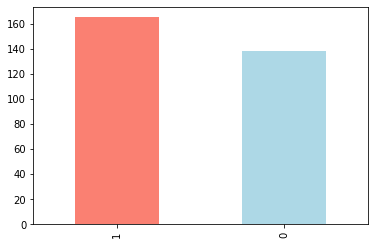

In [9]:
df['target'].value_counts().plot(kind='bar', color= ['salmon', 'lightblue']);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
### Heart disease frequency according to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


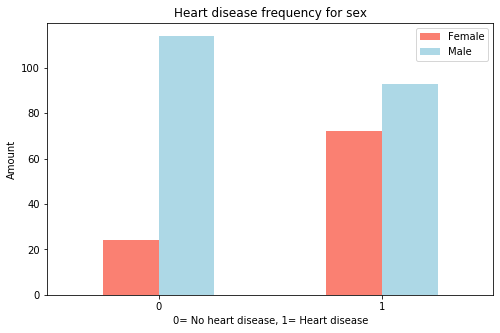

In [19]:
# create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(8,5),
                                   color=['salmon','lightblue']);
plt.title("Heart disease frequency for sex")
plt.xlabel('0= No heart disease, 1= Heart disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

## Age Vs MAx heart rate for heart disease

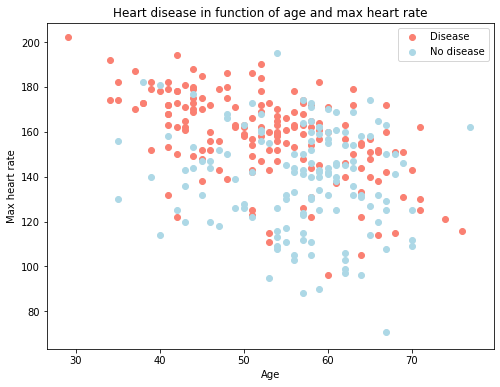

In [26]:
fix, ax = plt.subplots(figsize=(8,6))

# Scatter with positive examples - with heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon');

# Scatter with negative examples - without heart disease
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue');

plt.title('Heart disease in function of age and max heart rate')
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(['Disease', 'No disease']);

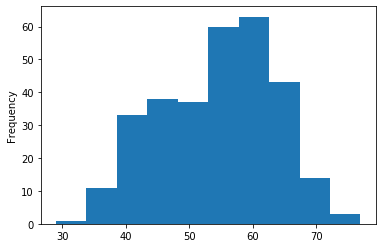

In [28]:
# Check distribution of age column with histogram
# Histograms are a way to tell if there is any outlier in our data. eg, here if we had people with age 120, we would know its 
# wrong and data needs to clean up
df.age.plot(kind='hist');

### Heart disease frequency for chest pain type

cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [30]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


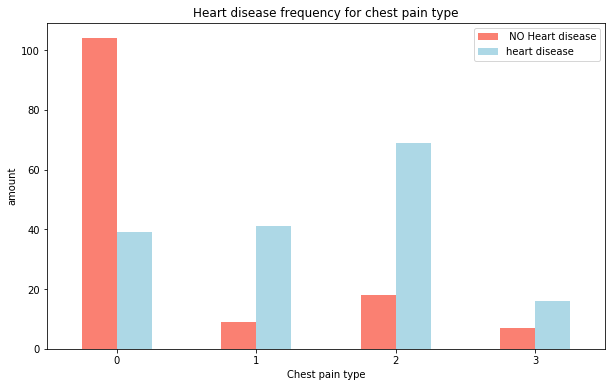

In [38]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])
plt.title("Heart disease frequency for chest pain type")
plt.xlabel('Chest pain type')
plt.ylabel('amount')
plt.legend([' NO Heart disease','heart disease']);
plt.xticks(rotation=0);

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Heart disease frequency for exercise induced chest pain 

exang - exercise induced angina (1 = yes; 0 = no)

In [44]:
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,142,23


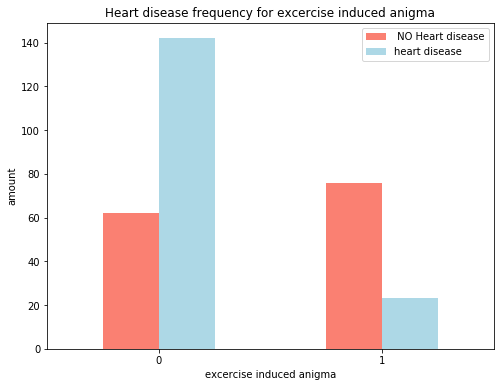

In [48]:
# Make the crosstab more visual
pd.crosstab(df.exang, df.target).plot(kind='bar',
                                  figsize=(8,6),
                                  color=['salmon', 'lightblue'])
plt.title("Heart disease frequency for excercise induced anigma")
plt.xlabel('excercise induced anigma')
plt.ylabel('amount')
plt.legend([' NO Heart disease','heart disease']);
plt.xticks(rotation=0);

In [40]:
# Make a Corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


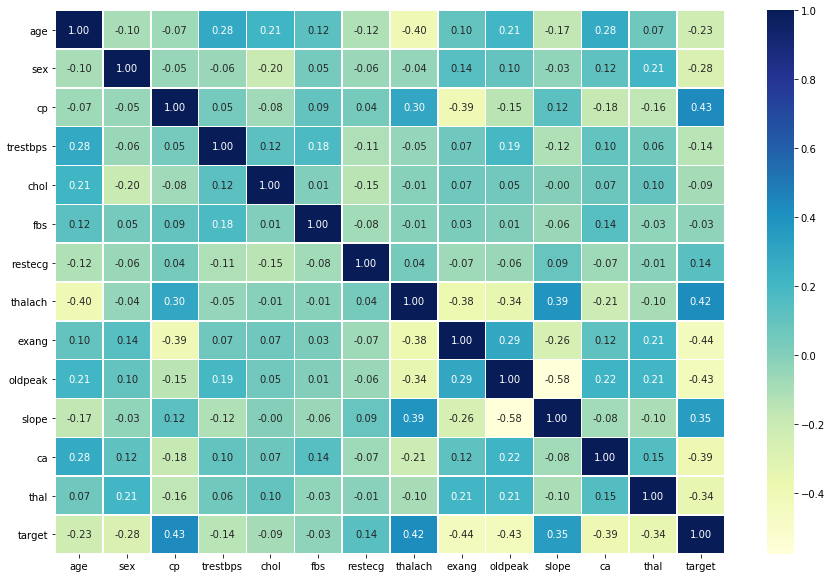

In [42]:
# Lets make correlation matrix prettier
# higher positive value means positive correlation
# Higher negative value means lower correlation
# Negative correlation - in which one variable decreases and other increases
# Positive correlation = in which as one variabe goes up, other also goes up

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

## 5. Modelling

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# SPlit the data
X = df.drop('target', axis=1)
y = df['target']

In [51]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# Split data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [56]:
X_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [57]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into train and test sets. Its time to build machine learning models.

We'll train it, find pattterns on training set.

Then we'll test it. Use the patterns on test set.

We'll try 3 machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [6]:
# Put models in a dictioanry

models ={'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier()}

# create function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores ={}
    for modelname, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to scores dictionary
        model_scores[modelname] = model.score(X_test, y_test)
    return model_scores

In [66]:
model_scores= fit_and_score(models = models, 
                            X_train=X_train, 
                            X_test= X_test, 
                            y_train= y_train,
                            y_test= y_test)
model_scores

C:\Users\iamrr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

In [67]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


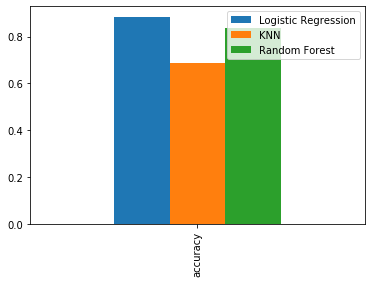

In [70]:
model_compare.plot.bar();

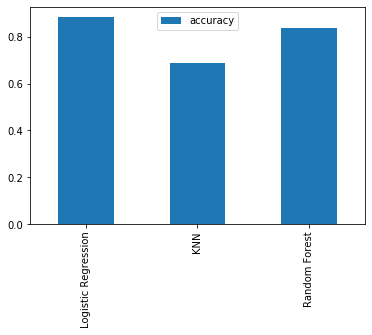

In [72]:
model_compare.T.plot.bar();

Now we have got our baseline model,and we'll experiment on them.

Let's look at the following:

* Hyperparameter tuning
* Feature importance 
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC
* Area under the curve (AUC)

## Hyperparameter tuning by hand

In [74]:
# Lets tune KNN by hand

train_scores =[]
test_scores= []

# Create a list of different values for n neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors =i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update testing score list
    test_scores.append(knn.score(X_test, y_test))

In [75]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [76]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum knn score on test data : 75.41%


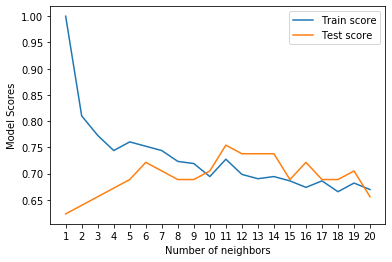

In [80]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores , label ='Test score')
plt.xticks(range(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Scores')
plt.legend();

print(f'Maximum knn score on test data : {max(test_scores)*100:.2f}%')

### Hyperparameters tuning using Randomized Search CV

We're going to tune:

* LogisticRegression
* RandomForestClassifier

In [14]:
# Creating hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver':['liblinear']}

# creating hyperparameters grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

In [8]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV( LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                                verbose= True)

# Fit random hyperparamter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [11]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [12]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression. Now lets do for RandomForest classifier

In [15]:
# Random Forest classifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter= 20,
                          verbose= True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [16]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [17]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyper parameter tuning with GridSearchCV

We'll improve LogisticRegression as its the best so far

In [19]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver':['liblinear']}

gs_log_reg = GridSearchCV( LogisticRegression(),
                          param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [20]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [21]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned hyperparameter model beyond accuracy:

roc curve, auc curve,
classification report,
confucion matrix,
precision,
recall,
f1

In [24]:
y_preds = gs_log_reg.predict(X_test)

In [25]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

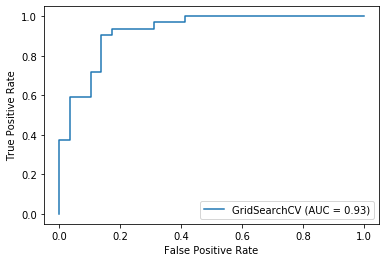

In [27]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg, X_test, y_test);

In [28]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


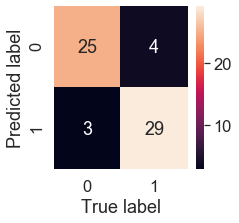

In [34]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=True);
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    

plot_conf_matrix(y_test, y_preds)

In [35]:
# Classification report

print( classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation
* Accuracy
* Precision
* Recall
* F1

---using cross_val_score()

In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# create new classifer with best paraemters
clf = LogisticRegression( C= 0.20433597178569418, solver='liblinear')

In [40]:
# cross- validated  accuracy
cv_acc = cross_val_score (clf,
                         X,
                         y,
                         scoring= 'accuracy',
                         cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [41]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [42]:
# cross- validated  precision
cv_precision = cross_val_score (clf,
                         X,
                         y,
                         scoring= 'precision',
                         cv=5)
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [43]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [44]:
# cross- validated recall
cv_recall = cross_val_score (clf,
                         X,
                         y,
                         scoring= 'recall',
                         cv=5)
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [45]:
# cross- validated F1
cv_f1 = cross_val_score (clf,
                         X,
                         y,
                         scoring= 'f1',
                         cv=5)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

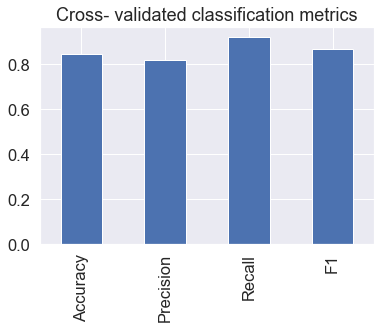

In [49]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1}, 
                            index = [0])

cv_metrics.T.plot.bar(title= 'Cross- validated classification metrics',
                      legend= False);

## Feature Importance 

Its a way of asking which features contributes most to the outcome of the model and how they contributed.

Finding feature importance is different for each model.

In [51]:
# Fit an instance of LogisticRegression

clf = LogisticRegression( C= 0.20433597178569418, solver='liblinear' )
clf.fit(X_train, y_train);

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
# clf.coef_ = gives the coefficient of how each feature affects the outcome 

clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [53]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

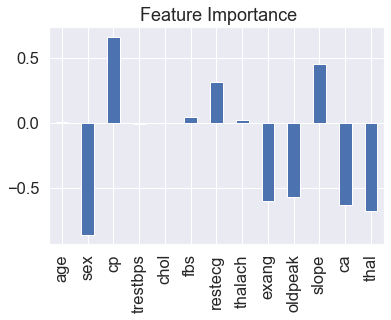

In [54]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title=' Feature Importance', legend = False);

In [56]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [58]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Expermentation

Ask yourself:
    * Can you find more data
    * Can you find better model, like CatBoost or XGBoost
    * can you improve current model beyond what's done so far
    * If model is good enough, how would you export and share it`    